In [1]:
from fenics import *
import matplotlib.pyplot as plt

## Pre-stress for initial conditions

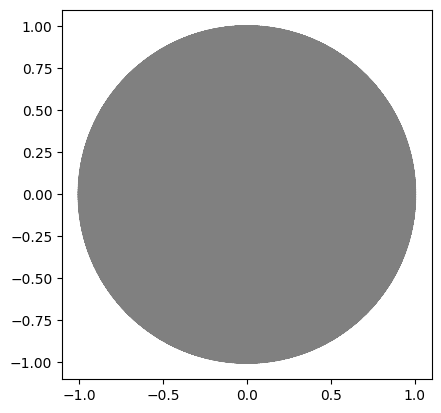

In [2]:
filename = "mesh/meshCircle"
mesh = Mesh(filename + ".xml")
bounds = MeshFunction("size_t", mesh, filename + "_facet_region.xml")
face = MeshFunction("size_t", mesh, filename + "_physical_region.xml")
plot(mesh)

In [3]:
# Scaled variables
E = 1e3
nu = 0.3
mu = E / (2 * (1 + nu))
lambda_ = E * nu / ((1 + nu) * (1 - 2 * nu))

# Create mesh and define function space
V = VectorFunctionSpace(mesh, 'P', 1)

# Define boundary condition
tol = 1E-14

def clamped_boundary(x, on_boundary):
    return on_boundary and x[0] < tol
g = Expression(("2*x[0]/sqrt(x[0]*x[0]+x[1]*x[1])", "2*x[1]/sqrt(x[0]*x[0]+x[1]*x[1])"), degree=2)
bc = DirichletBC(V, g, bounds,1)

# Define strain and stress

def epsilon(u):
    return 0.5*(grad(u) + grad(u).T)
    #return sym(nabla_grad(u))

def sigma(u):
    return lambda_*div(u)*Identity(d) + 2*mu*epsilon(u)

# Define variational problem
u = TrialFunction(V)
d = u.geometric_dimension() # space dimension
v = TestFunction(V)
f = Constant((0, 0))  # body force
T = Constant((0, 0))
q = 1e4
a = inner(sigma(u), epsilon(v))*dx
L = dot(f, v)*dx + dot(T, v)*ds

# Compute solution
u0 = Function(V)
solve(a == L, u0, bc)


Solving linear variational problem.


## Visco-elastic model

In [4]:
# parameters and util functions

E = 1e5
nu = 6*1e7
q = 3.09*1e5

def sym_grad(u):
    return 0.5*(grad(u) + grad(u).T)

def antisym_grad(u):
    return 0.5*(grad(u) - grad(u).T)

def sigma(u):
    return 2*nu*sym_grad(u) #+ 2*E*eps


In [5]:
# Create mesh

filename = "mesh/meshHoles"
mesh_init = Mesh(filename + ".xml")
bounds = MeshFunction("size_t", mesh_init, filename + "_facet_region.xml")
face = MeshFunction("size_t", mesh_init, filename + "_physical_region.xml")

Solving linear variational problem.


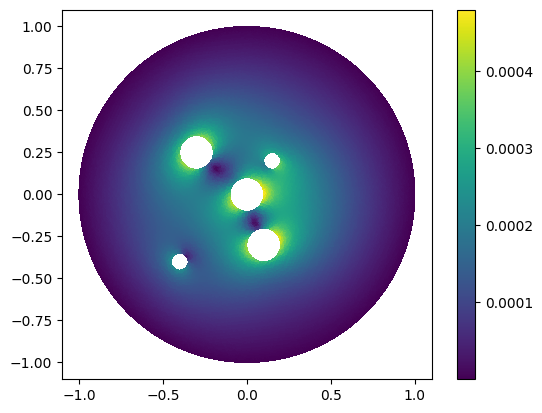

Solving linear variational problem.
[1.99989182e+00 3.34817075e-05 3.34817085e-05 ... 3.21837670e-05
 3.21837686e-05 1.99999181e+00]
Solving linear variational problem.
Solving linear variational problem.
[1.99978312e+00 6.71218366e-05 6.71218396e-05 ... 6.45321349e-05
 6.45321397e-05 1.99998358e+00]
Solving linear variational problem.
Solving linear variational problem.
[1.99967390e+00 1.00921178e-04 1.00921184e-04 ... 9.70456368e-05
 9.70456466e-05 1.99997531e+00]
Solving linear variational problem.
Solving linear variational problem.
[1.99956415e+00 1.34880521e-04 1.34880531e-04 ... 1.29724805e-04
 1.29724821e-04 1.99996701e+00]
Solving linear variational problem.
Solving linear variational problem.[1.99945388e+00 1.69000657e-04 1.69000673e-04 ... 1.62570172e-04
 1.62570196e-04 1.99995867e+00]

Solving linear variational problem.


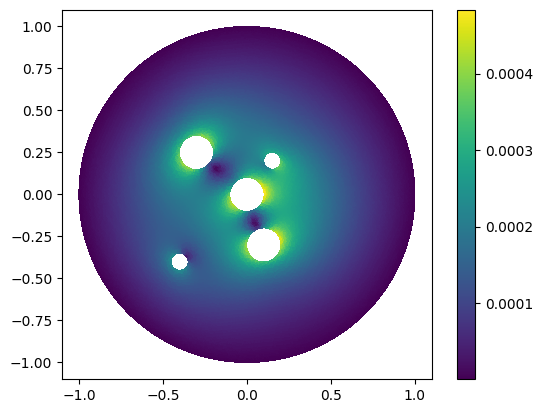

Solving linear variational problem.
[1.99934308e+00 2.03282375e-04 2.03282397e-04 ... 1.95582267e-04
 1.95582301e-04 1.99995029e+00]
Solving linear variational problem.
[1.99923174e+00 2.37726465e-04 2.37726494e-04 ... 2.28761621e-04
 2.28761667e-04 1.99994187e+00]
Solving linear variational problem.
Solving linear variational problem.
Solving linear variational problem.
[1.99911988e+00 2.72333716e-04 2.72333753e-04 ... 2.62108763e-04
 2.62108822e-04 1.99993342e+00]
Solving linear variational problem.
Solving linear variational problem.[1.99900747e+00 3.07104917e-04 3.07104964e-04 ... 2.95624222e-04
 2.95624296e-04 1.99992493e+00]

Solving linear variational problem.
[1.99889453e+00 3.42040857e-04 3.42040915e-04 ... 3.29308524e-04
 3.29308615e-04 1.99991640e+00]
Solving linear variational problem.
Solving linear variational problem.


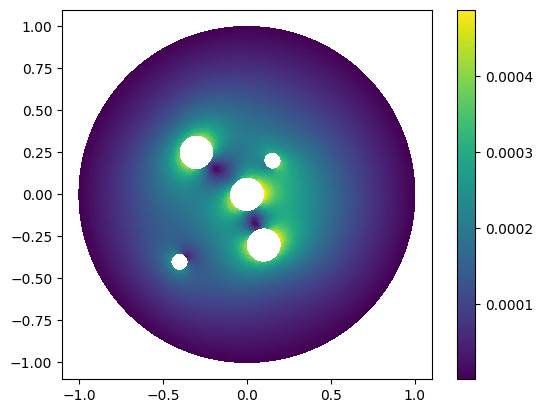

Solving linear variational problem.
[1.99878104e+00 3.77142325e-04 3.77142394e-04 ... 3.63162196e-04
 3.63162306e-04 1.99990784e+00]
Solving linear variational problem.
Solving linear variational problem.
[1.99866700e+00 4.12410109e-04 4.12410192e-04 ... 3.97185765e-04
 3.97185895e-04 1.99989924e+00]
Solving linear variational problem.
[1.99855242e+00 4.47844998e-04 4.47845094e-04 ... 4.31379756e-04
 4.31379908e-04 1.99989060e+00]
Solving linear variational problem.
Solving linear variational problem.
Solving linear variational problem.
[1.99843729e+00 4.83447780e-04 4.83447891e-04 ... 4.65744692e-04
 4.65744868e-04 1.99988192e+00]
Solving linear variational problem.
Solving linear variational problem.
[1.99832161e+00 5.19219242e-04 5.19219370e-04 ... 5.00281097e-04
 5.00281298e-04 1.99987321e+00]
Solving linear variational problem.


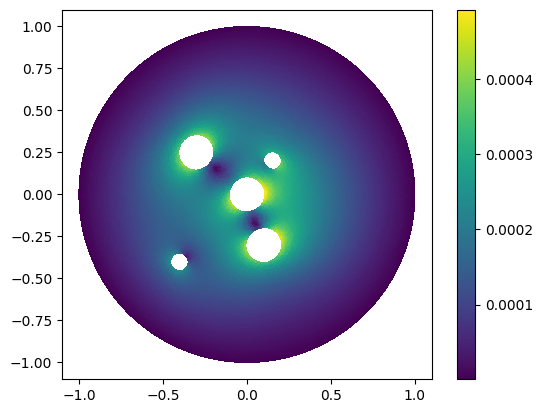

Solving linear variational problem.
[1.99820537e+00 5.55160173e-04 5.55160319e-04 ... 5.34989493e-04
 5.34989722e-04 1.99986446e+00]
Solving linear variational problem.
Solving linear variational problem.
[1.99808857e+00 5.91271361e-04 5.91271525e-04 ... 5.69870403e-04
 5.69870661e-04 1.99985567e+00]
Solving linear variational problem.
Solving linear variational problem.
[1.99797121e+00 6.27553592e-04 6.27553777e-04 ... 6.04924347e-04
 6.04924636e-04 1.99984684e+00]
Solving linear variational problem.
Solving linear variational problem.
[1.99785329e+00 6.64007655e-04 6.64007860e-04 ... 6.40151844e-04
 6.40152167e-04 1.99983798e+00]
Solving linear variational problem.
Solving linear variational problem.
[1.99773480e+00 7.00634336e-04 7.00634564e-04 ... 6.75553415e-04
 6.75553773e-04 1.99982908e+00]
Solving linear variational problem.


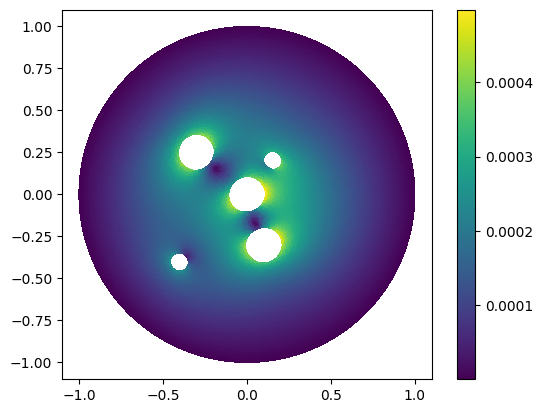

Solving linear variational problem.
[1.99761575e+00 7.37434423e-04 7.37434675e-04 ... 7.11129577e-04
 7.11129972e-04 1.99982014e+00]
Solving linear variational problem.
Solving linear variational problem.
[1.99749612e+00 7.74408703e-04 7.74408979e-04 ... 7.46880848e-04
 7.46881282e-04 1.99981116e+00]
Solving linear variational problem.
Solving linear variational problem.
[1.99737592e+00 8.11557962e-04 8.11558265e-04 ... 7.82807743e-04
 7.82808218e-04 1.99980215e+00]
Solving linear variational problem.
Solving linear variational problem.
[1.99725514e+00 8.48882987e-04 8.48883318e-04 ... 8.18910780e-04
 8.18911298e-04 1.99979309e+00]
Solving linear variational problem.
Solving linear variational problem.
[1.99713379e+00 8.86384566e-04 8.86384925e-04 ... 8.55190472e-04
 8.55191034e-04 1.99978400e+00]
Solving linear variational problem.


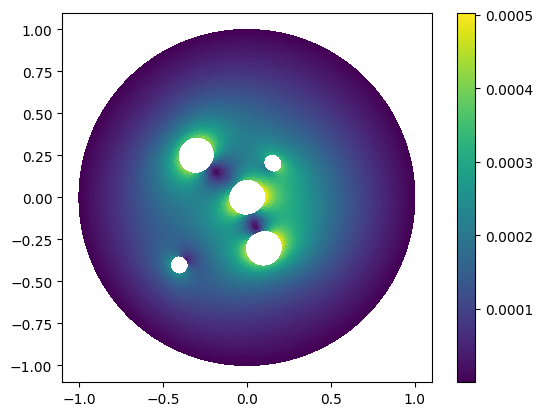

Solving linear variational problem.
[1.99701185e+00 9.24063484e-04 9.24063874e-04 ... 8.91647332e-04
 8.91647942e-04 1.99977487e+00]
Solving linear variational problem.
Solving linear variational problem.
[1.99688932e+00 9.61920528e-04 9.61920949e-04 ... 9.28281875e-04
 9.28282534e-04 1.99976571e+00]
Solving linear variational problem.
Solving linear variational problem.
[1.99676621e+00 9.99956485e-04 9.99956939e-04 ... 9.65094612e-04
 9.65095321e-04 1.99975650e+00]
Solving linear variational problem.
Solving linear variational problem.
[1.99664252e+00 1.03817214e-03 1.03817263e-03 ... 1.00208605e-03
 1.00208682e-03 1.99974726e+00]
Solving linear variational problem.
Solving linear variational problem.
[1.99651822e+00 1.07656828e-03 1.07656880e-03 ... 1.03925671e-03
 1.03925753e-03 1.99973798e+00]
Solving linear variational problem.


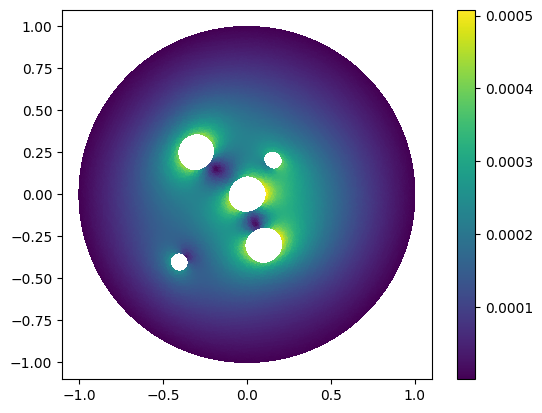

Solving linear variational problem.
[1.99639334e+00 1.11514569e-03 1.11514625e-03 ... 1.07660709e-03
 1.07660797e-03 1.99972866e+00]
Solving linear variational problem.
Solving linear variational problem.
[1.99626785e+00 1.15390516e-03 1.15390575e-03 ... 1.11413770e-03
 1.11413864e-03 1.99971930e+00]
Solving linear variational problem.
Solving linear variational problem.
[1.99614177e+00 1.19284746e-03 1.19284810e-03 ... 1.15184905e-03
 1.15185005e-03 1.99970990e+00]
Solving linear variational problem.
Solving linear variational problem.
[1.99601509e+00 1.23197340e-03 1.23197408e-03 ... 1.18974165e-03
 1.18974271e-03 1.99970047e+00]
Solving linear variational problem.
Solving linear variational problem.[1.99588779e+00 1.27128375e-03 1.27128447e-03 ... 1.22781600e-03
 1.22781712e-03 1.99969100e+00]

Solving linear variational problem.


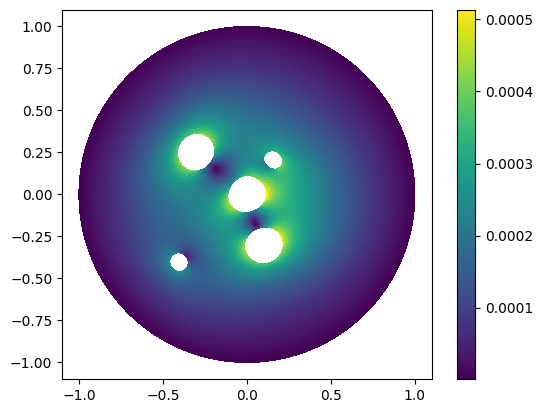

Solving linear variational problem.
[1.99575989e+00 1.31077930e-03 1.31078007e-03 ... 1.26607260e-03
 1.26607379e-03 1.99968149e+00]
Solving linear variational problem.
Solving linear variational problem.
[1.99563138e+00 1.35046083e-03 1.35046165e-03 ... 1.30451196e-03
 1.30451322e-03 1.99967194e+00]
Solving linear variational problem.
Solving linear variational problem.[1.99550226e+00 1.39032913e-03 1.39032999e-03 ... 1.34313458e-03
 1.34313592e-03 1.99966235e+00]

Solving linear variational problem.
Solving linear variational problem.
[1.99537252e+00 1.43038499e-03 1.43038590e-03 ... 1.38194096e-03
 1.38194237e-03 1.99965273e+00]
Solving linear variational problem.
Solving linear variational problem.
[1.99524217e+00 1.47062919e-03 1.47063015e-03 ... 1.42093160e-03
 1.42093309e-03 1.99964306e+00]
Solving linear variational problem.


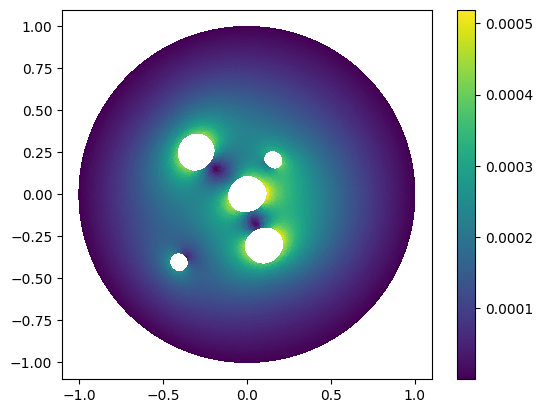

Solving linear variational problem.
[1.99511119e+00 1.51106251e-03 1.51106352e-03 ... 1.46010700e-03
 1.46010857e-03 1.99963336e+00]
Solving linear variational problem.
Solving linear variational problem.
[1.99497959e+00 1.55168574e-03 1.55168680e-03 ... 1.49946766e-03
 1.49946931e-03 1.99962362e+00]
Solving linear variational problem.
Solving linear variational problem.
[1.99484736e+00 1.59249966e-03 1.59250078e-03 ... 1.53901407e-03
 1.53901581e-03 1.99961384e+00]
Solving linear variational problem.
Solving linear variational problem.
[1.99471450e+00 1.63350506e-03 1.63350623e-03 ... 1.57874673e-03
 1.57874855e-03 1.99960403e+00]
Solving linear variational problem.
Solving linear variational problem.
[1.99458101e+00 1.67470272e-03 1.67470395e-03 ... 1.61866614e-03
 1.61866805e-03 1.99959417e+00]
Solving linear variational problem.


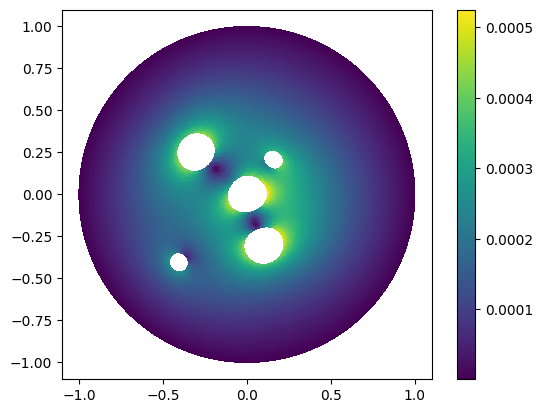

Solving linear variational problem.
[1.99444689e+00 1.71609342e-03 1.71609472e-03 ... 1.65877279e-03
 1.65877479e-03 1.99958428e+00]
Solving linear variational problem.
Solving linear variational problem.
[1.99431213e+00 1.75767796e-03 1.75767931e-03 ... 1.69906716e-03
 1.69906926e-03 1.99957435e+00]
Solving linear variational problem.
Solving linear variational problem.
[1.99417673e+00 1.79945711e-03 1.79945853e-03 ... 1.73954976e-03
 1.73955195e-03 1.99956438e+00]
Solving linear variational problem.
Solving linear variational problem.
[1.99404069e+00 1.84143166e-03 1.84143314e-03 ... 1.78022106e-03
 1.78022335e-03 1.99955437e+00]
Solving linear variational problem.
Solving linear variational problem.
[1.99390401e+00 1.88360238e-03 1.88360393e-03 ... 1.82108157e-03
 1.82108396e-03 1.99954432e+00]


In [6]:
# Create function spaces

V = VectorFunctionSpace(mesh_init, 'P', 1)
W = TensorFunctionSpace(mesh_init, 'P', 1)

# Define boundary condition

bc_out = DirichletBC(V, Constant((0,0)), bounds, 1)
g = Expression(("-0.01*(x[0]+0.4)/sqrt((x[0]+0.4)*(x[0]+0.4)+(x[1]+0.4)*(x[1]+0.4))", "-0.01*(x[1]+0.4)/sqrt((x[0]+0.4)*(x[0]+0.4)+(x[1]+0.4)*(x[1]+0.4))"), degree=2)
bc_in = DirichletBC(V, g, bounds, 4)
bcs = [bc_out] #, bc_in]

# Define variational problem
dt = 0.1
eps0 = Function(W)
u0 = interpolate(u0, V)
eps0.assign(project(sym_grad(u0),W))
for t in range(50):
    
    V = VectorFunctionSpace(mesh_init, 'P', 1)
    bc_in = DirichletBC(V, g, bounds, 4)
    bc_out = DirichletBC(V, Constant((0,0)), bounds, 1)
    bcs = [bc_out] #, bc_in]
    utrial = TrialFunction(V)
    v = TestFunction(V)
    u0 = interpolate(u0, V)
    a_sigma = inner(2*nu*sym_grad(utrial), sym_grad(v))*dx + q*inner(utrial,v)*dx
    L_sigma = - inner(2*E*eps0, sym_grad(v))*dx

    u = Function(V)

    solve(a_sigma == L_sigma, u, bcs)
    if t % 5 == 0:
        sol = plot(u,mode='displacement')
        plt.colorbar(sol)
        plt.show()
    # mesh update
    # u0.assign(u)
    ALE.move(mesh_init, u)
    W = TensorFunctionSpace(mesh_init, 'P', 1)
    eps0 = interpolate(eps0, W)
    # epsilon update 

    epstrial = TrialFunction(W)
    w = TestFunction(W)
    a_eps = (1/dt)*inner(epstrial, w)*dx + inner(dot(u,grad(epstrial)), w)*dx + inner(dot(epstrial,antisym_grad(u)),w)*dx \
            - inner(dot(antisym_grad(u),epstrial),w)*dx - inner(dot(sym_grad(u),epstrial),w)*dx - inner(dot(epstrial,sym_grad(u)),w)*dx
    L_eps = (1/dt)*inner(eps0, w)*dx + inner(sym_grad(u),w)*dx
    eps = Function(W)
    solve(a_eps == L_eps, eps)
    print(eps.vector().get_local())
    eps0.assign(eps)

